1. Library and Data Load

In [3]:
# titanic data 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
base_path = "/Volumes/GoogleDrive/My Drive/fastcamp/datas/spaceship-titanic/"

train = pd.read_csv(base_path + "train.csv")
test = pd.read_csv(base_path + "test.csv")
submission = pd.read_csv(base_path + "sample_submission.csv")

In [48]:
# 데이터의 shape을 확인
print(train.shape, test.shape)

(8693, 14) (4277, 13)


In [49]:
### 
# memory_usage = "deep" : 데이터의 정확한 memory usage를 보여준다. 
train.info(memory_usage = "deep")
print()
test.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 3.7 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dt

2. Data Processing

True     4378
False    4315
Name: Transported, dtype: int64

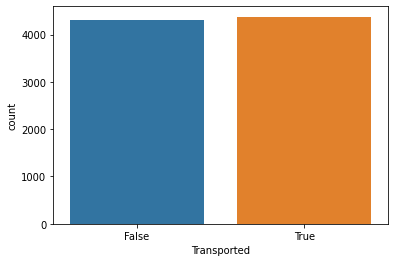

In [50]:
# 1. 결측치 확인
train[train.isnull().any(axis = 1)]

# 2. dtype이 object인 column 확인
cat_features = train.columns[train.dtypes == "object"]

# 3. target value distribution
sns.countplot(data = train, x = "Transported")
train.Transported.value_counts()
# True & False가 비슷해서 인밸런스 문제는 발생 안한다. 

In [51]:
# 4. 결측치 처리
train = train.dropna() # 연습이라 쿨하게 드랍한다.

# 5. dtype이 object 처리
train = train.drop(cat_features, axis = 1) # 연습이라 쿨하게 드랍한다.
train

# # 6. target value Encoding
target_map = {True : 1, False : 0}
train.Transported = train.Transported.map(target_map)

train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0


### 3. Data Preparation

- train, validation data를 만듭니다.





In [52]:
from sklearn.model_selection import train_test_split

# X,y 나누기
X = train.drop(columns = "Transported") # 독립변수 = feature vector
y = train.Transported # 종속변수 = target vector

# train, test 나누기
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42) # random_state : 데이터셋을 한번 랜덤셔플한 뒤 고정 시키고 싶어서.
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(5284, 6) (1322, 6) (5284,) (1322,)


### 4. Training

In [53]:
# 1. SVM
from sklearn.svm import SVC

# 2. RandomForest 
from sklearn.ensemble import RandomForestClassifier

### 하이퍼파라미터 튜닝
clf = SVC(C = 100) # C : [0.1, 1000], kernel : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
clf2 = RandomForestClassifier(n_estimators = 100, # DT의 개수
                              max_depth = 4, # rule-of-thumb : sqrt(# of features)
                              max_features = 0.8, # 0.7 ~ 0.9 사이를 사용
                              random_state = 42,
                              n_jobs = 2) # 코랩에서는 2가 최대

clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=0.8, n_jobs=2, random_state=42)

### 5. Evaluation

- Evaluation metric를 정하고, metric을 기준으로 train, validation 성능을 측정합니다.

In [54]:
from sklearn.metrics import accuracy_score

pred_train = clf.predict(X_train)
pred_val = clf.predict(X_val)

pred_train2 = clf2.predict(X_train)
pred_val2 = clf2.predict(X_val)

print("----- SVM -----")
print("Train Accuracy : %.4f" % accuracy_score(y_train, pred_train))
print("Validation Accuracy : %.4f" % accuracy_score(y_val, pred_val))
print("\n----- Random Forest -----")
print("Train Accuracy : %.4f" % accuracy_score(y_train, pred_train2))
print("Validation Accuracy : %.4f" % accuracy_score(y_val, pred_val2))

----- SVM -----
Train Accuracy : 0.8055
Validation Accuracy : 0.7965

----- Random Forest -----
Train Accuracy : 0.8024
Validation Accuracy : 0.7965


In [55]:
pred_train

array([0, 0, 1, ..., 0, 0, 1])

### 6. Prediction
- TO-DO : test라는 DataFrame을 train과 똑같이 만들어서, X_test를 만들어보세요.


In [56]:
# 1. 테스트 데이터의 결측치 처리 --> test dataset은 na 버리면 안된다!
# data leakage : 예측 데이터는 오직 "예측"에만 사용해야한다. 
# train.mean() : """train""" data의 각 column별 평균값으로 """test""" data의 각 column의 결측치를 채웁니다.  
X_test = test.fillna(train.mean())

# 2. dtype이 object 처리
X_test = X_test.drop(cat_features, axis = 1) # 연습이라 쿨하게 드랍한다.
X_test

# 3. 예측 : SVM만 보자
# output = clf.predict(X_test)
output2 = clf2.predict(X_test)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.000000,0.0,0.0,0.0,0.0,0.0
1,19.000000,0.0,9.0,0.0,2823.0,0.0
2,31.000000,0.0,0.0,0.0,0.0,0.0
3,38.000000,0.0,6652.0,0.0,181.0,585.0
4,20.000000,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0
4273,42.000000,0.0,847.0,17.0,10.0,144.0
4274,28.894036,0.0,0.0,0.0,0.0,0.0
4275,28.894036,0.0,2680.0,0.0,0.0,523.0


In [57]:
# 3. 예측 : SVM만 보자
# output = clf.predict(X_test)
output2 = clf2.predict(X_test)

### 7. Make submission file

In [58]:
submission = pd.read_csv(base_path + "sample_submission.csv")
submission
submission.info()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [59]:
inverse_map = {0 : False, 1 : True}
temp = pd.Series(output2).map(inverse_map).values
submission.Transported = temp

In [60]:
submission.to_csv("submission.csv", index = False)